In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
import visualkeras

2022-11-19 16:53:43.880894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 16:53:44.066211: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-19 16:53:44.759407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/yisan/anaconda3/envs/gpu_env/lib/
2022-11-19 16:53:44.759463: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_pl

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = (X_train.astype("float32") / 255).reshape(X_train.shape[0], 28, 28, 1)
X_test = (X_test.astype("float32") / 255).reshape(X_test.shape[0], 28, 28, 1)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dg = ImageDataGenerator(width_shift_range=0.15, height_shift_range=0.15)

dg.fit(X_train)

itr = dg.flow(X_train, y_train, batch_size=X_train.shape[0], shuffle=True)

X, y = itr.next()

X_train = np.concatenate((X_train, X), axis=0)
y_train = np.concatenate((y_train, y))

In [4]:
y_train = to_categorical(y_train).astype('float32')
y_test = to_categorical(y_test).astype('float32')

In [5]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [16]:
three_layer_conv = Sequential()

three_layer_conv.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
three_layer_conv.add(Dropout(rate=0.2))
three_layer_conv.add(BatchNormalization())
three_layer_conv.add(Conv2D(32, 3, activation='relu'))
three_layer_conv.add(MaxPooling2D())
three_layer_conv.add(Dropout(rate=0.2))
three_layer_conv.add(BatchNormalization())

three_layer_conv.add(Conv2D(64, 3, activation='relu'))
three_layer_conv.add(MaxPooling2D())
three_layer_conv.add(Dropout(rate=0.2))
three_layer_conv.add(BatchNormalization())

three_layer_conv.add(Flatten())

three_layer_conv.add(Dense(200, activation='relu'))
three_layer_conv.add(Dense(10, activation='softmax'))

three_layer_conv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

three_layer_conv_history = three_layer_conv.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


2022-11-17 23:25:56.000356: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.
2022-11-17 23:25:56.169278: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.


1200/1200 [==============================] - 6s 5ms/step - loss: 0.0927 - accuracy: 0.8090 - val_loss: 0.0672 - val_accuracy: 0.8568
Epoch 2/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0628 - accuracy: 0.8731 - val_loss: 0.0482 - val_accuracy: 0.9036
Epoch 3/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0547 - accuracy: 0.8906 - val_loss: 0.0453 - val_accuracy: 0.9126
Epoch 4/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0495 - accuracy: 0.9013 - val_loss: 0.0416 - val_accuracy: 0.9184
Epoch 5/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0462 - accuracy: 0.9097 - val_loss: 0.0399 - val_accuracy: 0.9236
Epoch 6/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0437 - accuracy: 0.9136 - val_loss: 0.0398 - val_accuracy: 0.9228
Epoch 7/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0410 - accuracy: 0.9201 - val_loss: 0.0410 - val_accuracy: 0.9211
Epo

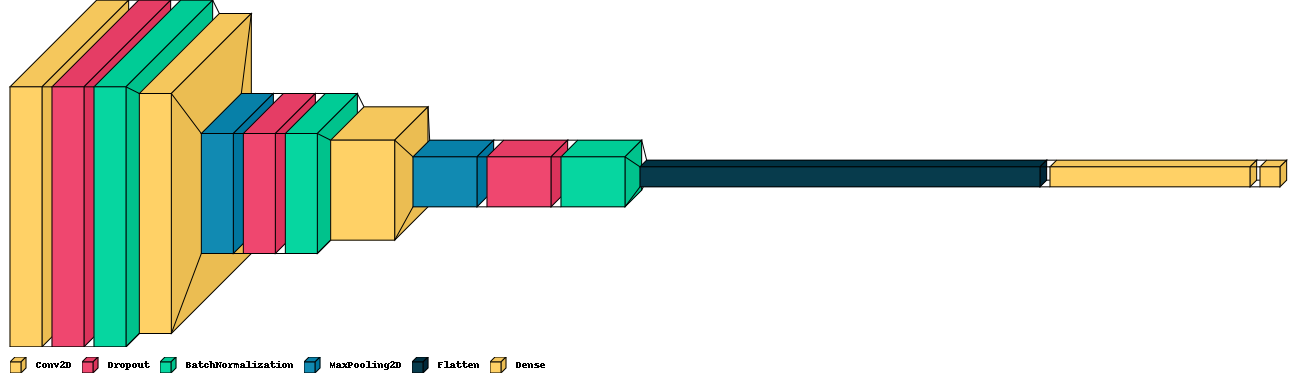

<Figure size 800x1200 with 0 Axes>

In [17]:
plt.figure(figsize=(10, 15), dpi=80)
visualkeras.layered_view(three_layer_conv, legend=True, scale_xy=10, scale_z=1)

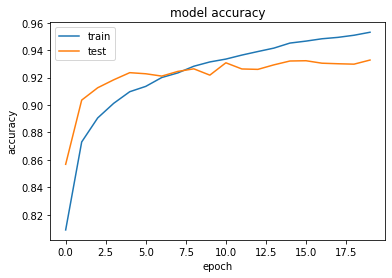

In [18]:
plt.plot(three_layer_conv_history.history['accuracy'])
plt.plot(three_layer_conv_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

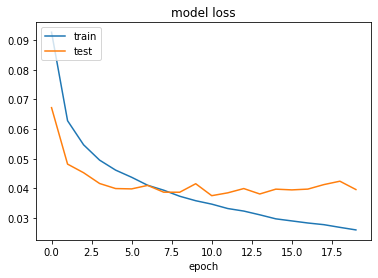

In [19]:
plt.plot(three_layer_conv_history.history['loss'])
plt.plot(three_layer_conv_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
three_layer_dropout_1 = Sequential()

three_layer_dropout_1.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
three_layer_dropout_1.add(Dropout(rate=0.1))
three_layer_dropout_1.add(BatchNormalization())
three_layer_dropout_1.add(Conv2D(32, 3, activation='relu'))
three_layer_dropout_1.add(MaxPooling2D())
three_layer_dropout_1.add(Dropout(rate=0.1))
three_layer_dropout_1.add(BatchNormalization())

three_layer_dropout_1.add(Conv2D(64, 3, activation='relu'))
three_layer_dropout_1.add(MaxPooling2D())
three_layer_dropout_1.add(Dropout(rate=0.1))
three_layer_dropout_1.add(BatchNormalization())

three_layer_dropout_1.add(Flatten())

three_layer_dropout_1.add(Dense(200, activation='relu'))
three_layer_dropout_1.add(Dense(10, activation='softmax'))

three_layer_dropout_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

three_layer_dropout_1_history = three_layer_dropout_1.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test, y_test))

KeyboardInterrupt: 

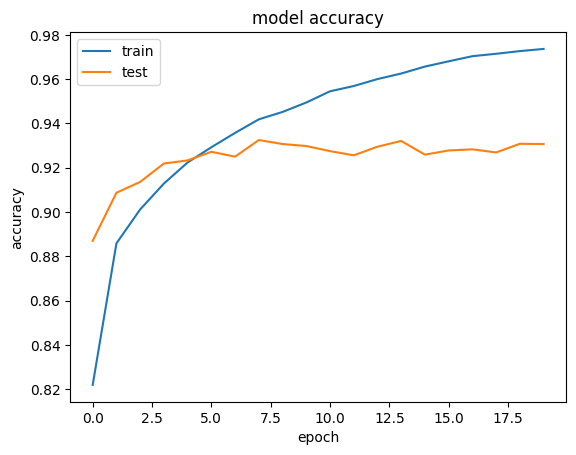

In [17]:
plt.plot(three_layer_dropout_1_history.history['accuracy'])
plt.plot(three_layer_dropout_1_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

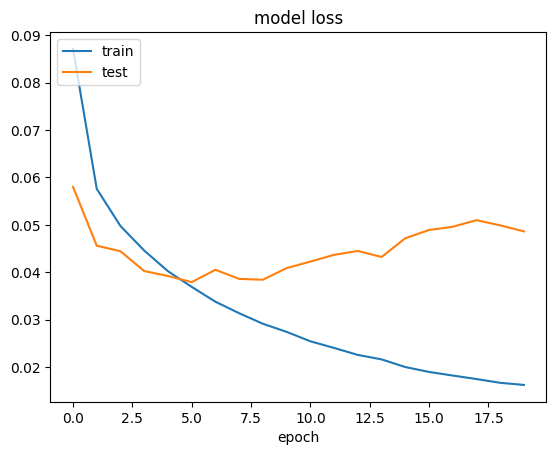

In [18]:
plt.plot(three_layer_dropout_1_history.history['loss'])
plt.plot(three_layer_dropout_1_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
three_layer_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)       

In [34]:
def create_model(learning_rate, dropout_rate, l1, l2):
    kernel_regularizer=regularizers.L1L2(l1=l1, l2=l2)
    opt = Adam(learning_rate=learning_rate)
    three_layer_conv = Sequential()

    three_layer_conv.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu', kernel_regularizer=kernel_regularizer))
    three_layer_conv.add(Dropout(rate=dropout_rate))
    three_layer_conv.add(BatchNormalization())
    three_layer_conv.add(Conv2D(32, 3, activation='relu', kernel_regularizer=kernel_regularizer))
    three_layer_conv.add(MaxPooling2D())
    three_layer_conv.add(Dropout(rate=dropout_rate))
    three_layer_conv.add(BatchNormalization())

    three_layer_conv.add(Conv2D(64, 3, activation='relu', kernel_regularizer=kernel_regularizer))
    three_layer_conv.add(MaxPooling2D())
    three_layer_conv.add(Dropout(rate=dropout_rate))
    three_layer_conv.add(BatchNormalization())

    three_layer_conv.add(Flatten())

    three_layer_conv.add(Dense(200, activation='relu'))
    three_layer_conv.add(Dense(10, activation='softmax'))

    three_layer_conv.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    # three_layer_conv_history = three_layer_conv.fit(X_train, y_train, batch_size=200, epochs=15, validation_data=(X_test, y_test))
    return three_layer_conv

In [35]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=create_model)

params = {'learning_rate': [0.01, 0.001], 'dropout_rate': [0, 0.15, 0.2, 0.25, 0.3], 'l1': [0, 1e-6, 1e-5, 1e-4], 'l2': [0, 1e-6, 1e-5, 1e-4]}
random_search = RandomizedSearchCV(model, param_distributions=params, cv=KFold(3))

es = EarlyStopping(monitor='accuracy', patience=5, min_delta=0.05)

random_search.fit(X_train, y_train, batch_size=200, epochs=20, callbacks=[es])

random_search.best_params_

/tmp/ipykernel_9194/2928410065.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/20
400/400 [==============================] - 4s 9ms/step - loss: 0.1346 - accuracy: 0.7498
Epoch 2/20
400/400 [==============================] - 4s 9ms/step - loss: 0.1028 - accuracy: 0.8193
Epoch 3/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0960 - accuracy: 0.8364
Epoch 4/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0928 - accuracy: 0.8451
Epoch 5/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0909 - accuracy: 0.8515
Epoch 6/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0897 - accuracy: 0.8560
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.0743 - accuracy: 0.8887
Epoch 1/20
400/400 [==============================] - 4s 9ms/step - loss: 0.1267 - accuracy: 0.7710
Epoch 2/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0962 - accuracy: 0.8342
Epoch 3/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0892 - accuracy: 0.851

In [25]:
# learning_rate =
# dropout_rate = 
# l1 = 
# l2 = 

model = create_model(0.001, 0, 0, 1e-05)
mc = ModelCheckpoint(filepath='modelcheckpoint', save_weights_only=True, monitor='accuracy', mode='max', save_best_only=True)
model_history = model.fit(X_train_1, y_train_1, validation_data=(X_val, y_val), epochs=20, batch_size=128)

Epoch 1/20


2022-11-17 23:43:40.544308: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 252134400 exceeds 10% of free system memory.
2022-11-17 23:43:40.650203: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 252134400 exceeds 10% of free system memory.


629/629 [==============================] - 5s 7ms/step - loss: 0.0865 - accuracy: 0.8290 - val_loss: 0.0755 - val_accuracy: 0.8519
Epoch 2/20
629/629 [==============================] - 4s 6ms/step - loss: 0.0574 - accuracy: 0.8890 - val_loss: 0.0585 - val_accuracy: 0.8867
Epoch 3/20
629/629 [==============================] - 4s 6ms/step - loss: 0.0472 - accuracy: 0.9104 - val_loss: 0.0560 - val_accuracy: 0.8921
Epoch 4/20
629/629 [==============================] - 4s 6ms/step - loss: 0.0401 - accuracy: 0.9259 - val_loss: 0.0562 - val_accuracy: 0.8971
Epoch 5/20
629/629 [==============================] - 4s 6ms/step - loss: 0.0340 - accuracy: 0.9396 - val_loss: 0.0558 - val_accuracy: 0.8978
Epoch 6/20
629/629 [==============================] - 4s 6ms/step - loss: 0.0289 - accuracy: 0.9521 - val_loss: 0.0554 - val_accuracy: 0.9044
Epoch 7/20
629/629 [==============================] - 4s 6ms/step - loss: 0.0241 - accuracy: 0.9617 - val_loss: 0.0665 - val_accuracy: 0.9006
Epoch 8/20
629/62

In [26]:
loss, acc = model.evaluate(X_test, y_test)
print(f'{acc*100:5.2f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9188
91.88


In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_18 (Dropout)        (None, 26, 26, 32)        0         
                                                                 
 batch_normalization_18 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 12, 12, 32)       

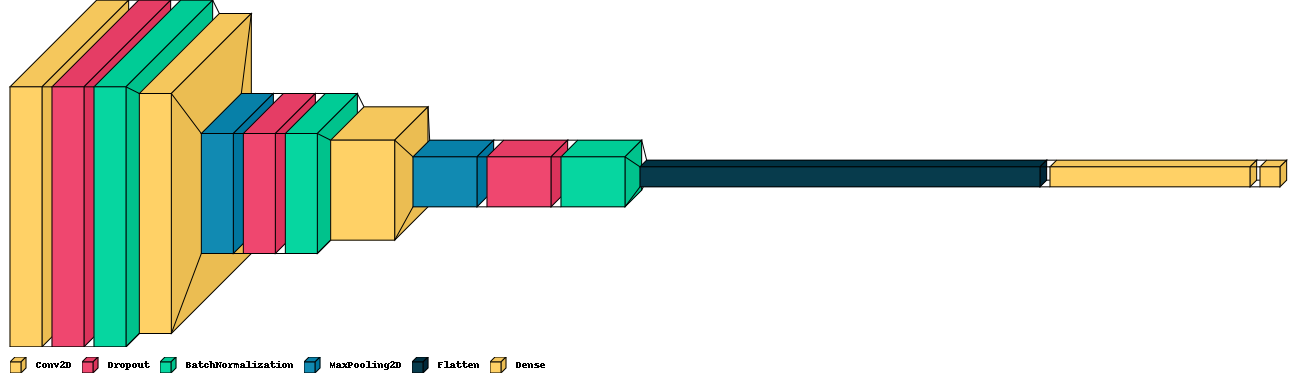

<Figure size 800x1200 with 0 Axes>

In [57]:
plt.figure(figsize=(10, 15), dpi=80)
visualkeras.layered_view(model, legend=True, scale_xy=10, scale_z=1)

In [6]:
def create_model(learning_rate, dropout_rate, l1, l2):
    kernel_regularizer=regularizers.L1L2(l1=l1, l2=l2)
    opt = Adam(learning_rate=learning_rate)
    four_layer_conv = Sequential()

    four_layer_conv.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu', kernel_regularizer=kernel_regularizer))
    four_layer_conv.add(Dropout(rate=dropout_rate))
    four_layer_conv.add(BatchNormalization())
    four_layer_conv.add(Conv2D(32, 3, activation='relu', kernel_regularizer=kernel_regularizer))
    four_layer_conv.add(MaxPooling2D())
    four_layer_conv.add(Dropout(rate=dropout_rate))
    four_layer_conv.add(BatchNormalization())

    four_layer_conv.add(Conv2D(64, 3, activation='relu', kernel_regularizer=kernel_regularizer))
    four_layer_conv.add(Dropout(rate=dropout_rate))
    four_layer_conv.add(BatchNormalization())
    four_layer_conv.add(Conv2D(64, 3, activation='relu', kernel_regularizer=kernel_regularizer))
    four_layer_conv.add(Dropout(rate=dropout_rate))
    four_layer_conv.add(BatchNormalization())

    four_layer_conv.add(Flatten())

    four_layer_conv.add(Dense(200, activation='relu'))
    four_layer_conv.add(Dense(10, activation='softmax'))

    four_layer_conv.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return four_layer_conv

In [11]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=create_model)

params = {'learning_rate': [0.01, 0.005, 0.001], 'dropout_rate': [0, 0.15, 0.2, 0.25, 0.3], 'l1': [0, 1e-6, 1e-5, 1e-4], 'l2': [0, 1e-6, 1e-5, 1e-4]}
random_search = RandomizedSearchCV(model, param_distributions=params, cv=KFold(3))

es = EarlyStopping(monitor='accuracy', patience=5, min_delta=0.05)

random_search.fit(X_train, y_train, batch_size=200, epochs=20, callbacks=[es])

random_search.best_params_

/tmp/ipykernel_31482/1328408795.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/20
400/400 [==============================] - 4s 10ms/step - loss: 0.1530 - accuracy: 0.7416
Epoch 2/20
400/400 [==============================] - 4s 9ms/step - loss: 0.1026 - accuracy: 0.8334
Epoch 3/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0859 - accuracy: 0.8604
Epoch 4/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0772 - accuracy: 0.8755
Epoch 5/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0716 - accuracy: 0.8843
Epoch 6/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0680 - accuracy: 0.8887
Epoch 7/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0662 - accuracy: 0.8942
Epoch 8/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0642 - accuracy: 0.8979
Epoch 9/20
400/400 [==============================] - 4s 9ms/step - loss: 0.0624 - accuracy: 0.9021
Epoch 10/20
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0561 - accuracy: 0.9

{'learning_rate': 0.001, 'l2': 1e-05, 'l1': 1e-05, 'dropout_rate': 0.3}

In [15]:
filepath = 'modelsave/model4_regularization.h5'
model = create_model(learning_rate=0.001, dropout_rate=0.3, l2=1e-05, l1=1e-05)
mc = ModelCheckpoint(filepath=filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)
model_history = model.fit(X_train_1, y_train_1, validation_data=(X_val, y_val), epochs=20, batch_size=128, callbacks=[mc])

Epoch 1/20
629/629 [==============================] - 6s 8ms/step - loss: 0.1400 - accuracy: 0.7541 - val_loss: 0.1431 - val_accuracy: 0.7454
Epoch 2/20
629/629 [==============================] - 5s 8ms/step - loss: 0.0955 - accuracy: 0.8392 - val_loss: 0.0907 - val_accuracy: 0.8433
Epoch 3/20
629/629 [==============================] - 5s 8ms/step - loss: 0.0825 - accuracy: 0.8619 - val_loss: 0.0891 - val_accuracy: 0.8457
Epoch 4/20
629/629 [==============================] - 5s 8ms/step - loss: 0.0759 - accuracy: 0.8747 - val_loss: 0.0690 - val_accuracy: 0.8889
Epoch 5/20
629/629 [==============================] - 5s 8ms/step - loss: 0.0716 - accuracy: 0.8828 - val_loss: 0.0686 - val_accuracy: 0.8867
Epoch 6/20
629/629 [==============================] - 5s 8ms/step - loss: 0.0689 - accuracy: 0.8884 - val_loss: 0.0710 - val_accuracy: 0.8835
Epoch 7/20
629/629 [==============================] - 5s 8ms/step - loss: 0.0665 - accuracy: 0.8931 - val_loss: 0.0703 - val_accuracy: 0.8842
Epoch 

In [16]:
model = create_model(learning_rate=0.001, dropout_rate=0.3, l2=1e-05, l1=1e-05)
model.load_weights(filepath)

loss, acc = model.evaluate(X_test, y_test)
print(f'{acc*100:5.2f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9261
92.61
